# Lecture 2

In [1]:
from IPython.display import Image

## Storing Big Data

RDBMS (relational database management systems) are the result of a lot of work and research over the past 40 years. 

RDBs have a different paradigm than most programming languages (SQL: query language) and follow mostly a centralized model. Such a system provides a lot of guarantees. 

### ACID Model

**Atomicity**: RBDs introduce a notion of **transaction** which can either **succeed** or **fail** completely. 

**Consistency**: A transaction moves the dDBs from a **valid state** to another **valid state**.

**Isolation**: Multiple transactions executing concurrently will give the same results as if they were executed sequentially.

**Durability**: A crash should not lead to data loss.

### BASE Model

ACID is very hard to implement in a distributed environment and we might need to move to less strict guarantees: BASE. 

**B**asically **A**vailable: Any machine should answer a query even with outdated data

**S**oft-State: Without user requests

**E**ventual **C**onsistency: 
- <u>Strict consistency</u> implies a write to a variable is instantaneously seen by all processors (Read often write always, return the latest value)

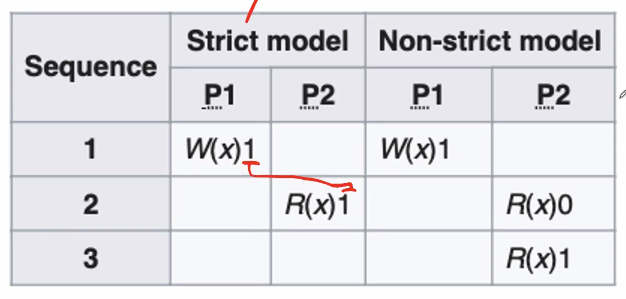

In [5]:
Image("pictures/strict_consistency.png", width=200)

- <u>Atomic consistency</u> (strongest consistency): Operations are executed in the same order on all machines (uses a global clock, same order as they were emitted), always deterministic

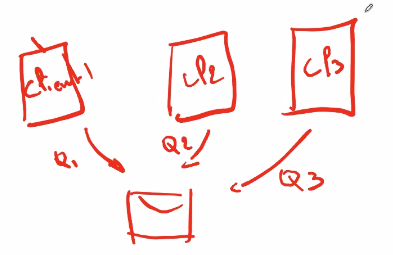

In [4]:
Image("pictures/atomic_consistency.png", width=200)

- <u>Sequential consistency</u> weaker than strict consistency. All write operations by multiple processors have to be seen in the same order (no specific order initially, not necessarily consistent between various executions). Sequential consistency + time -> atomic consistency (e.g. Google Spanner). The chosen is determined by an algorithm that is not fully deterministic

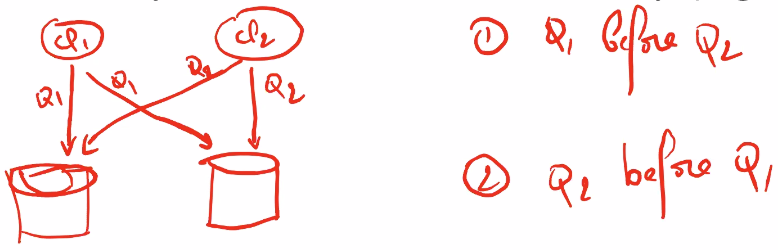

In [7]:
Image("pictures/sequential_consistency.png", width=300)

- <u>Eventual consistency</u> form of **weak consistency** (given enough time without update [soft state], all read access to a variable will return the latest value)

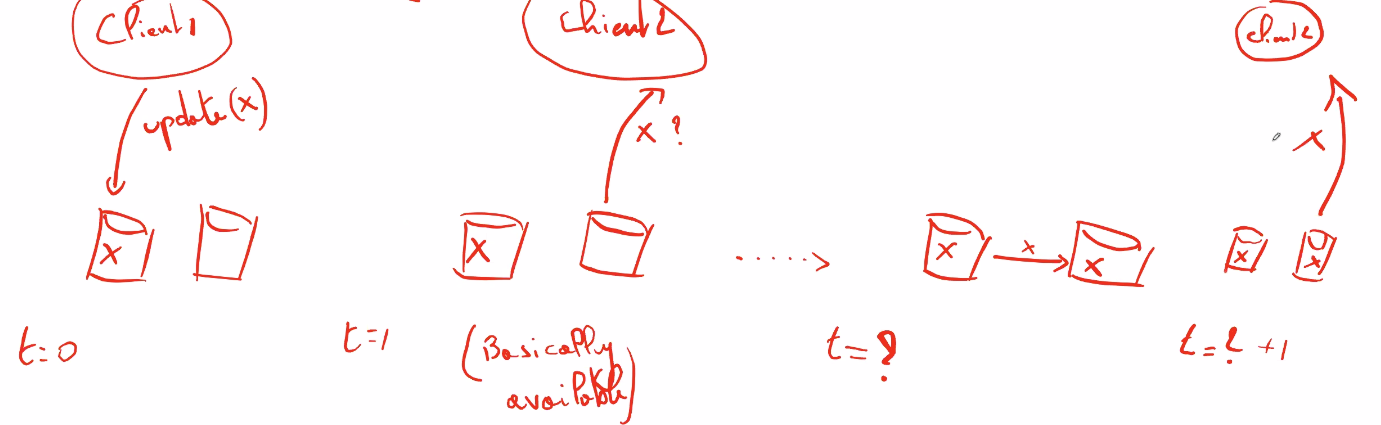

In [11]:
Image("pictures/eventual_consistency.png", width=600)

### CAP theorem

It is impossible for a distributed data store to simultaneously provide more than two out of the following three guarantees.

- **Consistency**: Every read receives the most recent write or an error
- **Availability**: Every request receives a (non-error) response, without the guarantee that it contains the most recent write
- **Partition tolerance**: The system continues to operate despite an arbitrary number of messages being dropped (or delayed) by the network between nodes

When a network partition failure happens should we decide to

- **Cancel** the operation and thus decrease the availability but ensure consistency
- **Proceed** with the operation and thus provide availability but risk inconsistency

The CAP theorem implies that in the presence of a network partition, one has to choose between consistency and availability. Note that consistency as defined in the CAP theorem is quite different from the consistency guaranteed in ACID database transactions.

## NoSQL

### Principles

- Not only SQL
- All follow the BASE principles
- Provides various properties under CAP
- Designed to scale horizontally (adding/removing machines)
- Replication (data is copied on multiple machines)
- Various designs.

### Examples of DB structures

**1. key-value**: Data can only be stored as unique key-value pairs.

Very simple API (get, put, delete) and range queries are often not supported. NoSQL DBs usually rely on consistent hashing (spread keys among multiples machines, copy pairs for redundancy)

<u>examples:</u> DynamoDB, Redis, Riak

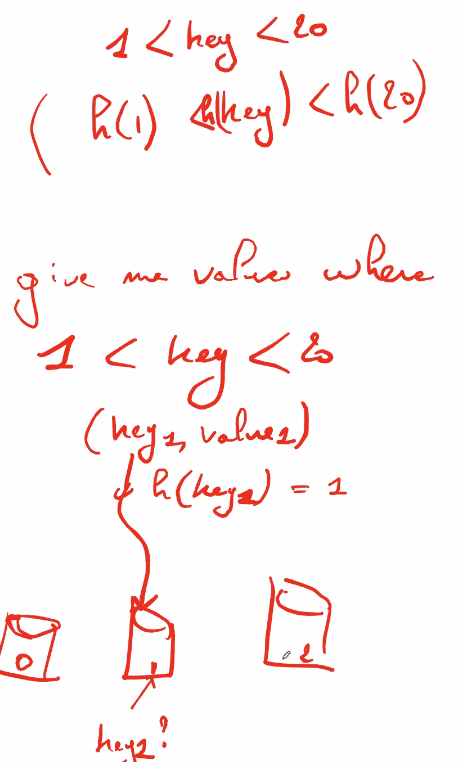

In [13]:
Image("pictures/key-value.png", width=300)

**2. wide column**: Use row/columns to store data (like RDBMS ecept columns have usually no fixed tpye, number of columns can vary from row to row). Can be seen as a 2D key-value store.

<u>examples:</u> Apache Hbase, Cassandra

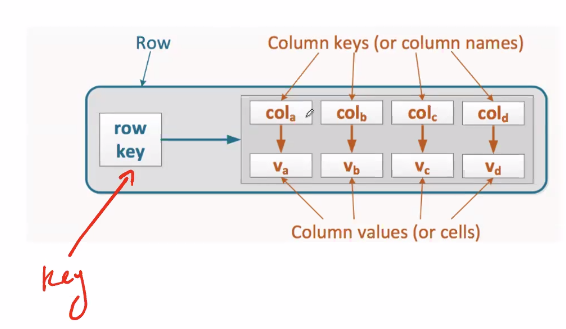

In [15]:
Image("pictures/wide_column.png", width=300)

**3. Document**: Data are stored as document (XML, JSON, etc.) which provides a rich data structure and support versioning.

<u>example:</u> CouchDB, MongoDB

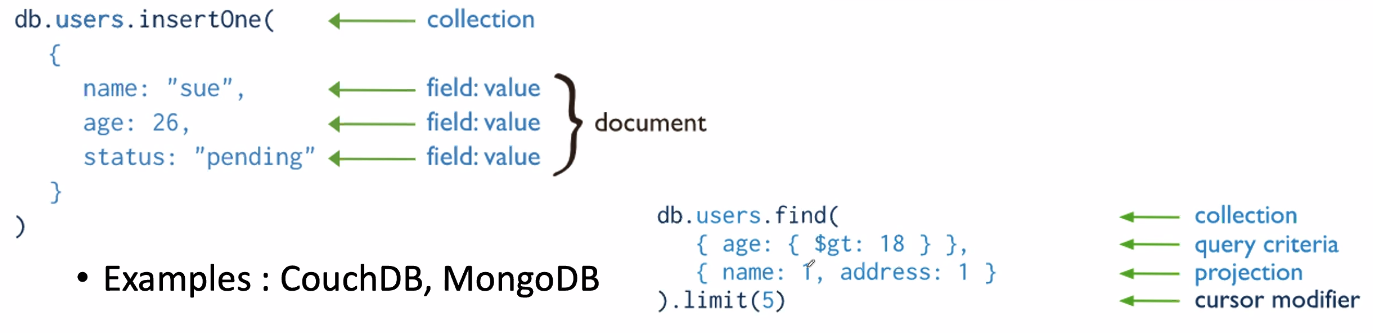

In [17]:
Image("pictures/mongodb_ex.png", width=500)

**4. graph oriented**: Considers data as graph and introduces relations more complex than key-value

<u>example:</u> Neo4J, RedisGraph

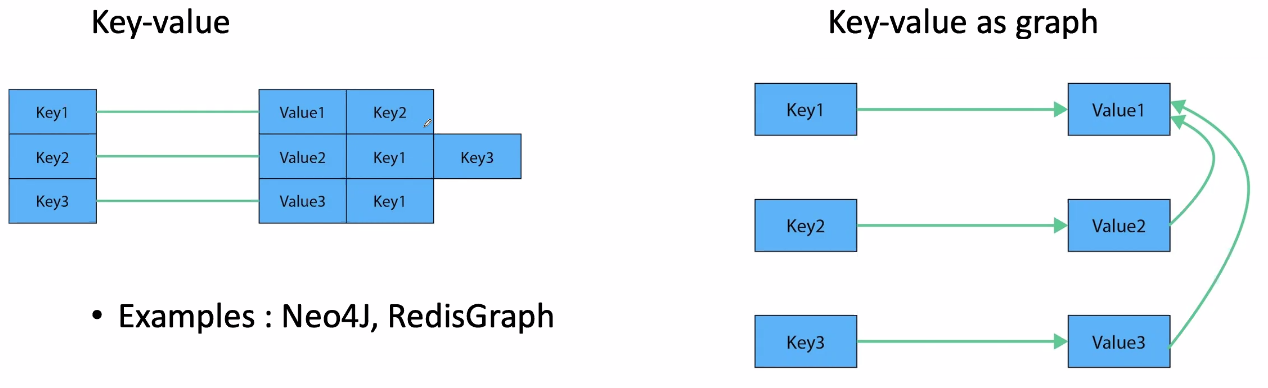

In [18]:
Image("pictures/graph_oriented.png", width=500)

### Distributed FileSystems

1. **Single node**

Adds as many HDD as possible; Users don't like managing independent HDD so they can be aggregated to give the illusion of a single drive; files are stored as blocks (4Mg on recent drives, blocks are spread among disk, RAID0)
- <u>Pros</u>: User friendly, very fast
- <u>Cons</u>: Not reliable

One can protect themselves against data loss by adding redundancy information to rebuild missing blocks (uses hamming cods). Structures such as RAID 5 or RAID 6 (group of blocks +1 or 2 parity block, all block spread among all disks).
- <u>Pros</u>: User friendly, fast, reliable
- <u>Cons</u>: Loss of disk space

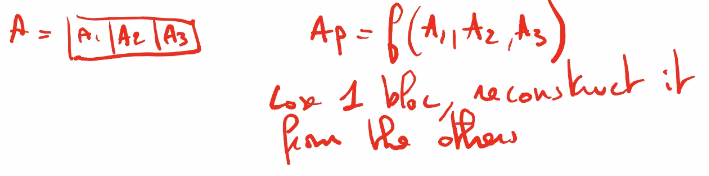

In [20]:
Image("pictures/redundancy_blocks.png", width=500)

2. **Multiple nodes**

Single nodes can be expensive and represent a single point of failure. Instead multiple nodes allow to use multiple machines (and each machine can use a RAID system). It is adding a layer on top of single nodes.

<u>examples:</u> Ceph, GlusterFS, HDFS

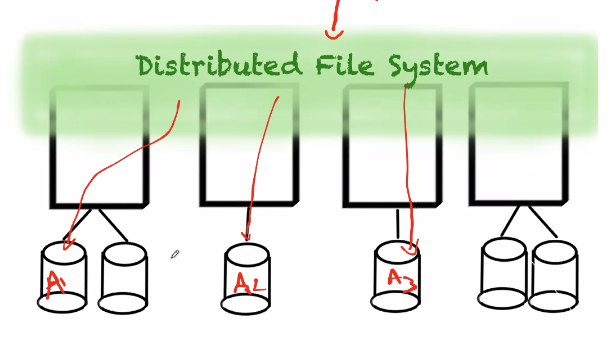

In [21]:
Image("pictures/multiple_nodes.png", width=500)

Storing foles on multiple nodes imply one cannot query all nodes. Instead we use a notion of **metadata** (it is data that was added by the OS. Date (creation, modification), ownership, location of blocks.

Usually "well known" nodes act as metadata servers (extremely important nodes, redundancy is mandatory for reliability.

### HADOOP

<u>**Principles**</u>

- Distributed filesystem over multiple nodes
- Provides a separate and global filesystem (unix like paths)
- Not part of the OS, added software (written in JAVA, works on any machine with JVM support, shipped with script or users and administrator)

<u>**Commands**</u>

All commands are done using bin/hdfs or bin/hadoop:
- hdfs ``command`` [options]
- hadoop ``command`` [options]
- 3 types of commands: client, admin, daemon

Client commands that use the filesystem:
- hdfs dfs ``args``
- hadoop fs ``args``: run the command args on the hdfs filesystem
- <u>example:</u> -mkdir, -put, -copyfromlocal, -get, -copytolocal, -rmr

> ``hdfs dfs -ls /home``

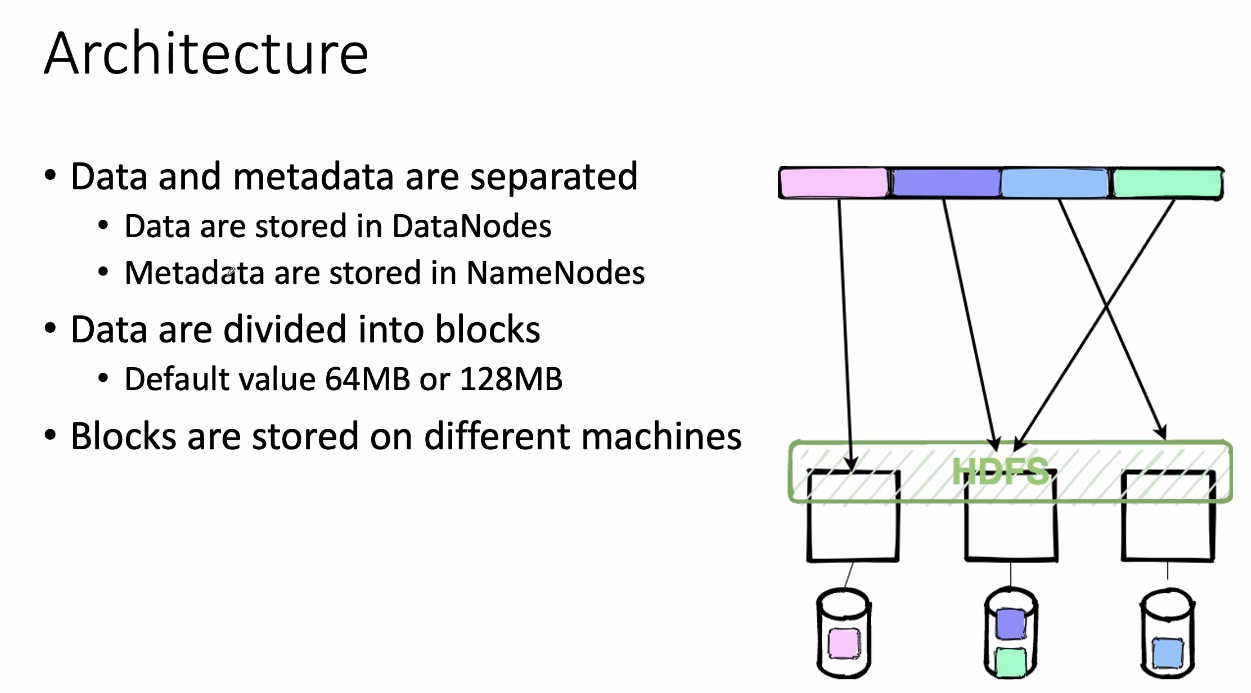

In [22]:
Image("pictures/hadoop_architecture.png", width=500)

- **Data can be replicated** (replication factor (default 3), more costly (space) than RAID or erasure codes)
- **Not all operations are supported** (no random write, only append and truncate)
- **Permission** (user and group for coarse grained control, access control lists (ACLs) for finer controls)

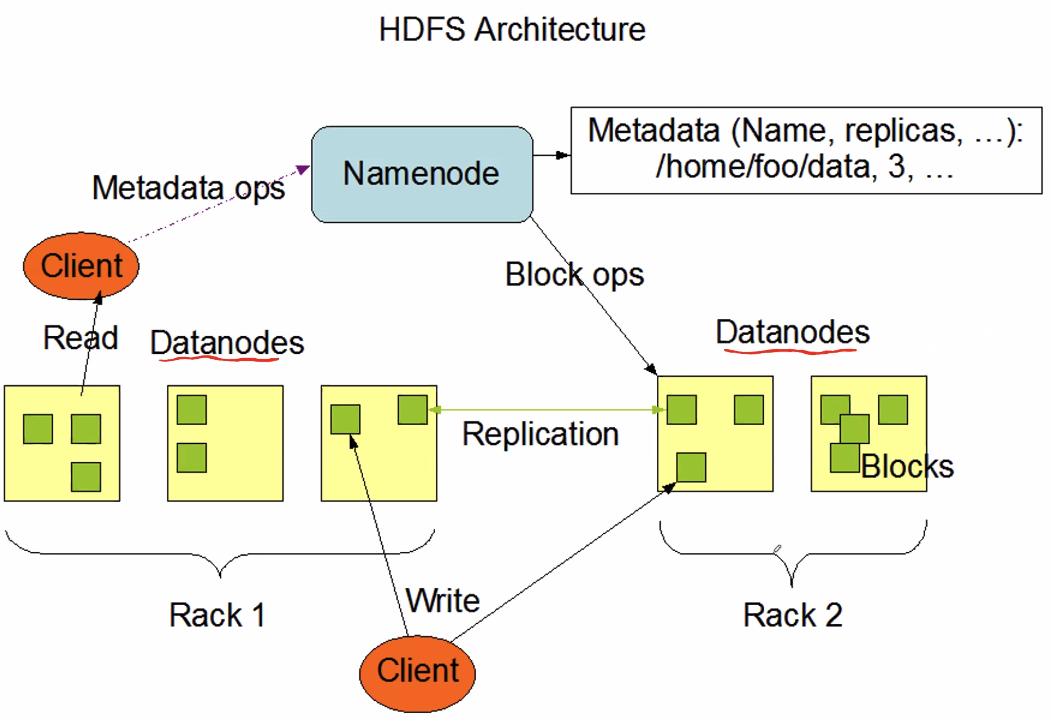

In [23]:
Image("pictures/hdfs_architecture.png", width=500)

**Reading and writing**:

- All clients' read and write requests go through name nodes
- Actual data go directly to clients
- Reading workflow: client sends request for file, namenode checks access right and returns list of blocks + datanodes)
- Writing workflow (client contacts namenode, namenode checks if writing is allowed, checks if file exists (if yes, error), namenode returns a list of datanodes, client sends data to datanodes in round-robin, after writing all blocks, the clients notifies the namenode)
- Replication is handled by datanodes while receiving data

**HDFS Blocks**:

- HD blocks: 4Mb
- HDFS blocks: 64-128Mb

Large blocks are not suited for storing small files. **Large blocks are meant to limit the overhead of metadata**.
There is a transfer cost of a block (disk access, latency, throughput) and large blocks minimize the impact of disk access and latency.

Replication is performed for fault tolerance (tries to put replica on differnt machine and different racks) and faster access (load blocks from node closer to client). 

**Fault Tolerance**:

Namenodes are a single point of failure (if it is down, one cannot access data anymore. If it is destroyed and metadata is lost, all data is lost). To prevent this, there is the possibility to use a secondary nameNoe (maintains snapshot of metadat + edit log and periodically plly edit log to metadata and store new state.

<u>In case of a crash:</u> Restart the namenode and get a snapshot + log of secondary namenode and rebuilt the recent state.

<u>But:</u> Rebuilding might be long and there is a risk of data loss

Hadoop 2 has high availability and supports 2, 3 or more namenode (1 active and one passive if active fails). 

- How to ensure consistency?
    - Relies on Journal Node
    - active write/edit log to Journal Node
    - Passive regularly get edit log from JournalNode

- Ther are protectio against failures of JournalNode
    - Usually use 3 of them but N ar possible
    - Agreement based on a quorum algorithm (the quorum algorithm is a costly algo so it's better to run it in small increments on the JN)
    - Can tolerate (N-1)/2 failures

## Processing Big Data

#### How to efficiently process large amount of data?

- Use many machines
- Use many cores

#### How to efficiently usaer many machine/cores?

- Use a suitable prtogramming model

#### What is a programmin model?

- A way to write some program
- with acces to a limited set of funsctions
    - provided by libraries of framework
- and an environement to execute it

### MapReduce

Popularized by a paper from Google: "MapReduce: simplified data processing on large clusters" (2008)
**Simple model with 2 basic operations: Map & Reduce**.

It assumes data are structured as pairs of (key, value).

It applies successive map and reduce operations (not necessarily limited to 1 map and 1 reduce)

Map and reduce are functions with defined input-output.

**MAP**: uses a single (key, value) to produce multiple pairs 
- input: (key, value) or (key, _)
- output: Oner or many (key, value) pairs

**REDUCE**: gets all values associated with a given key and produce new pairs

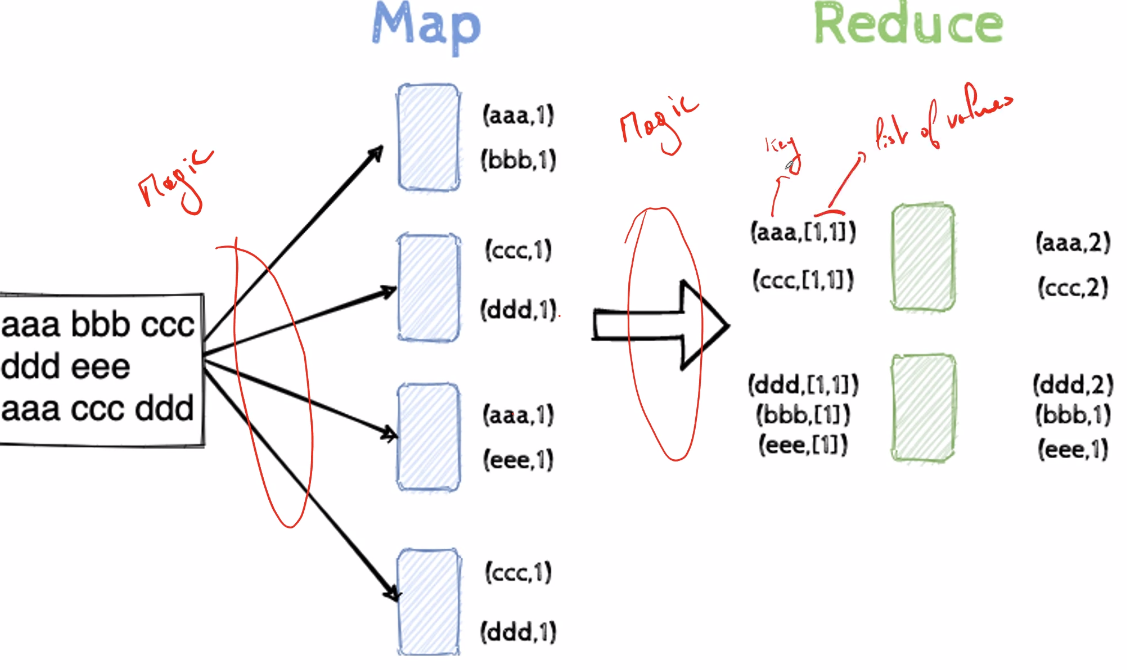

In [24]:
Image("pictures/mapreduce.png", width=500)

**Implementations questions:**

How is the input split into individual pairs for mappers?

How are outputs of map grouped by key and sent to the correct reduce?

How is final results written?

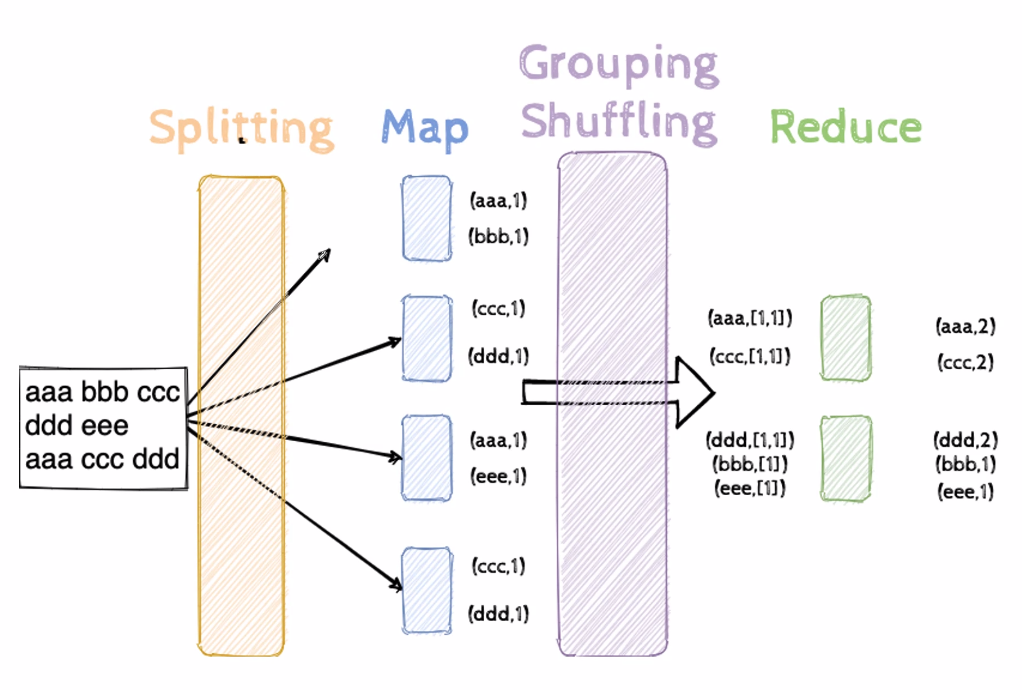

In [25]:
Image("pictures/mapreduce2.png", width=500)

**YARN**: Yet Another Resource Negotiator

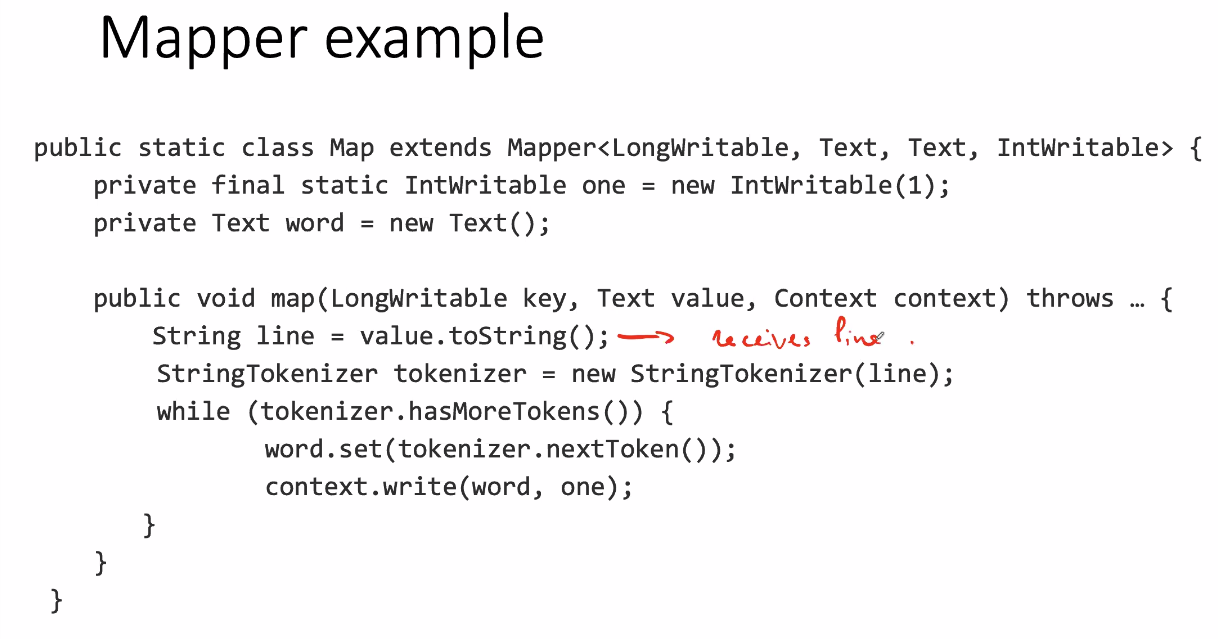

In [26]:
Image("pictures/mapper.png", width=500)


### Advanced Programming Models

### Case Study Hadoop & Spark

## Managing Fast DAta

### Introduction to data-streams processing

### Case study: Spark Streaming & Kafka